In [1]:
import os

import numpy as np
import pandas as pd

import plotly.express as px

import umap
import matplotlib.pyplot as plt

from datablocks.datablock import DBX, DATABLOCKS_STDOUT_LOGGING_POOL
from micron.datasets import miRCoHN, miRCoStats, miRNA, miRCoSeqs, ZSCC

import fasttext

# DATA

In [2]:
def display_umap(frame, *, color=None):
    _umap = umap.UMAP()
    _udata = _umap.fit_transform(frame.fillna(0.0))
    plt.scatter(_udata[:, 0], _udata[:, 1], c=color)

## counts

In [3]:
mircohn = DBX(miRCoHN, 'mircohn').Datablock(verbose=True)

In [4]:
mircohn.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


{'logcounts': ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoHN/version=0.5.3/logcounts'),
 'pivots': ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoHN/version=0.5.3/pivots'),
 'controls': ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoHN/version=0.5.3/controls'),
 'downregulated_mirna_infixes': ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoHN/version=0.5.3/downregulated_mirna_infixes')}

In [5]:
logcof = mircohn.read('logcounts')
logcof.head()

>>> miRCoHN: Reading topic 'logcounts'


,hsa-let-7a-5p,hsa-let-7a-3p,hsa-let-7a-2-3p,hsa-let-7b-5p,hsa-let-7b-3p,hsa-let-7c-5p,hsa-let-7d-5p,hsa-let-7d-3p,hsa-let-7e-5p,hsa-let-7e-3p,...,hsa-miR-7976,hsa-miR-6791-3p,hsa-miR-6753-5p,hsa-miR-6744-5p,hsa-miR-7113-5p,hsa-miR-6741-3p,hsa-miR-6715b-5p,hsa-miR-7974,hsa-miR-6846-3p,hsa-miR-7704
,MIMAT0000062,MIMAT0004481,MIMAT0010195,MIMAT0000063,MIMAT0004482,MIMAT0000064,MIMAT0000065,MIMAT0004484,MIMAT0000066,MIMAT0004485,...,MIMAT0031179,MIMAT0027483,MIMAT0027406,MIMAT0027389,MIMAT0028123,MIMAT0027384,MIMAT0025842,MIMAT0031177,MIMAT0027593,MIMAT0030019
TCGA-4P-AA8J-01A-11R-A39B-13,14.504822,5.143873,1.940001,13.138620,4.472495,9.448644,7.769270,8.412836,11.317443,4.003010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5149-01A-01R-1513-13,14.819992,5.630475,3.225721,13.020136,4.754974,8.050535,8.616476,8.769807,9.673931,2.936214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5152-01A-02R-1872-13,15.941677,4.943807,1.590171,14.256493,4.863189,8.864225,8.158338,8.020158,10.890396,2.507708,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5555-01A-01R-1513-13,15.802900,6.445344,0.295596,14.887152,6.050484,11.544371,8.233075,8.792593,9.743270,3.073204,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-BA-5556-01A-01R-1513-13,15.663689,5.207313,0.944278,14.488905,5.294776,9.392189,8.385563,8.040203,9.421633,1.207313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## seqs

In [6]:
mirna = DBX(miRNA, 'mirna').Datablock(verbose=True).SCOPE()

In [7]:
mirna.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


{None: ({},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRNA/version=0.0.1')}

In [8]:
seqf = mirna.read()
seqf

,ID,Accession,sequence
0,hsa-let-7a-1,MI0000060,UGGGAUGAGGUAGUAGGUUGUAUAGUUUUAGGGUCACACCCACCAC...
1,hsa-let-7a-2,MI0000061,AGGUUGAGGUAGUAGGUUGUAUAGUUUAGAAUUACAUCAAGGGAGA...
2,hsa-let-7a-3,MI0000062,GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...
3,hsa-let-7b,MI0000063,CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...
4,hsa-let-7c,MI0000064,GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...
...,...,...,...
1912,hsa-mir-9983,MI0033670,GGAAAUGUUCUAGCCAAAAAAGUUUGCCAAGAACCAUUGUGUCUUU...
1913,hsa-mir-9985,MI0032313,CCCAUGUUCAUUGAGCUUUAUUCACAGUGGCUAAGCUAUGGAAUCC...
1914,hsa-mir-9986,MI0032316,AAGAAGUAUUUUGCAAAAAGUGUGAGGUUGUCAUGCCUGCUAUUAC...
1915,hsa-mir-99a,MI0000101,CCCAUUGGCAUAAACCCGUAGAUCCGAUCUUGUGGUGAAGUGGACC...


## counts + seqs

In [9]:
help(DBX(miRCoSeqs, 'mircoseqs').SCOPE)

Help on function SCOPE in module micron.datasets:

SCOPE(seqs: pandas.core.frame.DataFrame, logcounts: pandas.core.frame.DataFrame, npasses: int = 5, nseqs_per_record: int = 200) -> None
    SCOPE(seqs: pandas.core.frame.DataFrame, logcounts: pandas.core.frame.DataFrame, npasses: int = 5, nseqs_per_record: int = 200)



In [10]:
MIR_COSEQS_SEQS_PER_RECORD = 300
MIR_COSEQS_NPASSES = 1000

In [11]:
mircoseqshn = \
    DBX(miRCoSeqs, f"mircoseqshn_{MIR_COSEQS_NPASSES}_{MIR_COSEQS_SEQS_PER_RECORD}")\
    .Datablock(verbose=True).SCOPE(logcounts=mircohn.READ('logcounts'), 
                                   seqs=mirna.READ(), 
                                   npasses=MIR_COSEQS_NPASSES, 
                                   nseqs_per_record=MIR_COSEQS_SEQS_PER_RECORD)

In [12]:
mircoseqshn

datablocks.datablock.DBX('micron.datasets.miRCoSeqs', 'mircoseqshn_1000_300')

In [13]:
mircoseqshn.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


>>> miRCoHN: Reading topic 'logcounts'
>>> miRCoSeqs: Wrote counts to /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/counts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1000/nseqs_per_record=300/miRCos.parquet
>>> miRCoSeqs: Wrote logcounts to /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/logcounts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1000/nseqs_per_record=300/miRLogCos.parquet
>>> miRCoSeqs: Wrote sequences to /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/seqs/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1000/nseqs_per_record=300/miRSeqs.parquet
>>> miRCoSeqs: Generating samples using 1000 passes
>>> miRCoSeqs: pass 0
>>> miRCoSeqs: Generated 159600 in pass 0 for a total of 159600 so far
>>> miRCoSeqs: pass 1
>>> miRCo

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


>>> miRCoSeqs: Generated 159600 in pass 10 for a total of 1755600 so far
>>> miRCoSeqs: pass 11
>>> miRCoSeqs: Generated 159600 in pass 11 for a total of 1915200 so far
>>> miRCoSeqs: pass 12
>>> miRCoSeqs: Generated 159600 in pass 12 for a total of 2074800 so far
>>> miRCoSeqs: pass 13
>>> miRCoSeqs: Generated 159600 in pass 13 for a total of 2234400 so far
>>> miRCoSeqs: pass 14
>>> miRCoSeqs: Generated 159600 in pass 14 for a total of 2394000 so far
>>> miRCoSeqs: pass 15
>>> miRCoSeqs: Generated 159600 in pass 15 for a total of 2553600 so far
>>> miRCoSeqs: pass 16
>>> miRCoSeqs: Generated 159600 in pass 16 for a total of 2713200 so far
>>> miRCoSeqs: pass 17
>>> miRCoSeqs: Generated 159600 in pass 17 for a total of 2872800 so far
>>> miRCoSeqs: pass 18
>>> miRCoSeqs: Generated 159600 in pass 18 for a total of 3032400 so far
>>> miRCoSeqs: pass 19
>>> miRCoSeqs: Generated 159600 in pass 19 for a total of 3192000 so far
>>> miRCoSeqs: pass 20
>>> miRCoSeqs: Generated 159600 in pass 

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


>>> miRCoSeqs: Wrote 532 to /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/rec_sample_ranges/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1000/nseqs_per_record=300/miRSampleRanges.parquet


/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


{'logcounts': ({'seqs': 'DBX.micron.datasets.miRNA@mirna',
   'logcounts': 'DBX.micron.datasets.miRCoHN@mircohn:logcounts',
   'npasses': 1000,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/logcounts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1000/nseqs_per_record=300'),
 'counts': ({'seqs': 'DBX.micron.datasets.miRNA@mirna',
   'logcounts': 'DBX.micron.datasets.miRCoHN@mircohn:logcounts',
   'npasses': 1000,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/counts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1000/nseqs_per_record=300'),
 'seqs': ({'seqs': 'DBX.micron.datasets.miRNA@mirna',
   'logcounts': 'DBX.micron.datasets.miRCoHN@mircohn:logcounts',
   'npasses': 1000,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/dat

### joint space: counts*seqs

#### jlogcounts

In [14]:
jlogcounts = mircoseqshn.read('logcounts')
jlogcounts.head(3)

,0000062,0000063,0000064,0000065,0000066,0000067,0000068,0000433,0000434,0000437,...,0000265,0022965,0000093,0000094,0000095,0000097,0000098,0030983,0000100,0000101
TCGA-4P-AA8J-01A-11R-A39B-13,14.504822,13.138620,9.448644,7.769270,11.317443,13.187334,7.269636,6.452317,10.767229,10.344077,...,1.220108,NaN,11.852996,4.342099,3.015288,7.753781,11.641802,NaN,9.646373,14.087285
TCGA-BA-5149-01A-01R-1513-13,14.819992,13.020136,8.050535,8.616476,9.673931,14.169467,7.435174,7.369915,11.338634,10.215696,...,-0.233712,NaN,12.760863,0.936214,5.507756,5.060910,9.728823,NaN,9.071211,15.378387
TCGA-BA-5152-01A-02R-1872-13,15.941677,14.256493,8.864225,8.158338,10.890396,14.973935,7.622369,7.833873,12.231620,8.567450,...,0.742174,NaN,12.068041,4.175133,4.464640,4.705648,9.354673,NaN,8.975793,14.841258


In [15]:
jlogcounts_zscc = DBX(ZSCC, 'mircoseqshnlog', rebuild=True).Datablock(verbose=True).SCOPE(data_frame=mircoseqshn.READ('logcounts'), fillna=0.0)

In [19]:
%%time
jlogcounts_zscc.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting zscc to data of size 532


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/dkarpeyev/py39/lib/py

Wrote zscc pickle to /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/ZSCC/version=0.3.1/zscc/data_frame=DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/zscc.pkl
Assigning optimal clusters to data of len 532


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Wrote zscc clusters to /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/ZSCC/version=0.3.1/clusters/data_frame=DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet
CPU times: user 11min 17s, sys: 12min 2s, total: 23min 19s
Wall time: 2min 1s


/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


{'zscc': ({'data_frame': 'DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:logcounts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/ZSCC/version=0.3.1/zscc/data_frame=DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0'),
 'clusters': ({'data_frame': 'DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:logcounts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/ZSCC/version=0.3.1/clusters/data_frame=DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0')}

/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/ZSCC/version=0.3.1/clusters/data_frame=DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:logcounts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


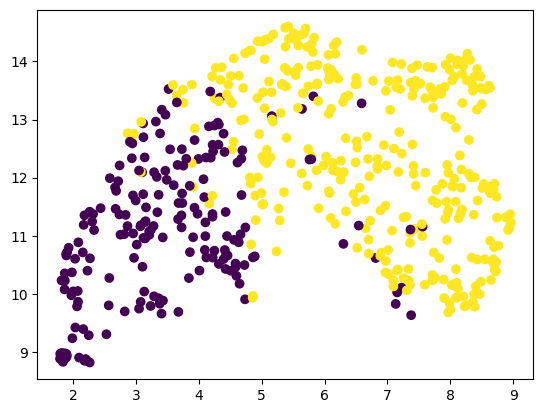

In [20]:
display_umap(jlogcounts, color=jlogcounts_zscc.read(topic='clusters').clusters)

#### jcounts

In [21]:
jcounts = mircoseqshn.read('counts')
jcounts.head(3)

,0000062,0000063,0000064,0000065,0000066,0000067,0000068,0000433,0000434,0000437,...,0000265,0022965,0000093,0000094,0000095,0000097,0000098,0030983,0000100,0000101
TCGA-4P-AA8J-01A-11R-A39B-13,23248.041046,9018.179426,698.755424,218.164080,2552.053786,9327.884710,154.304492,87.567115,1742.845943,1299.802939,...,2.329641,NaN,3699.196684,20.281586,8.085227,215.834437,3195.445963,NaN,801.396688,17405.848223
TCGA-BA-5149-01A-01R-1513-13,28924.253673,8307.141414,265.126057,392.480113,816.851897,18426.154735,173.065445,165.411446,2589.815969,1189.133954,...,0.850444,NaN,6940.689790,1.913500,45.498778,33.379944,848.530951,NaN,537.906114,42594.723033
TCGA-BA-5152-01A-02R-1872-13,62939.458522,19571.857262,466.012533,285.696127,1898.173084,32181.293262,197.043346,228.155456,4809.329619,379.366986,...,1.672695,NaN,4293.805345,18.065095,22.079560,26.094025,654.692409,NaN,503.480879,29353.771422


In [22]:
jcounts_zscc = DBX(ZSCC, 'mircoseqhnco').Datablock(verbose=True).SCOPE(data_frame=mircoseqshn.READ('counts'), fillna=0.0)

In [23]:
jcounts_zscc.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


{'zscc': ({'data_frame': 'DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:counts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/ZSCC/version=0.3.1/zscc/data_frame=DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0'),
 'clusters': ({'data_frame': 'DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:counts',
   'clustering': 'sklearn.cluster.KMeans',
   'n_reps': 100,
   'lo': 2,
   'hi': 5,
   'fillna': 0.0},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/ZSCC/version=0.3.1/clusters/data_frame=DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0')}

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/ZSCC/version=0.3.1/clusters/data_frame=DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


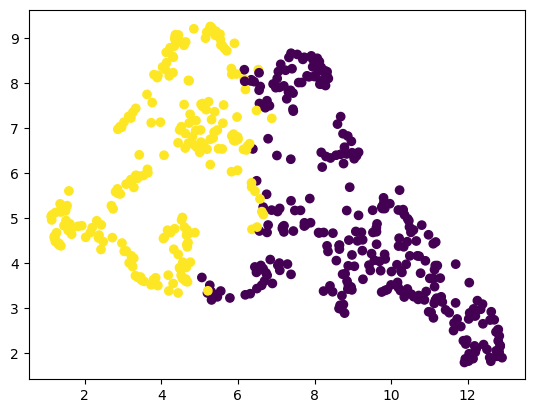

In [24]:
display_umap(jcounts, color=jcounts_zscc.read('clusters').clusters)

#### jseqs

In [25]:
jseqs = mircoseqshn.read('seqs')
jseqs

,ID,Accession,sequence
accession,,,
0000062,hsa-let-7a-3,MI0000062,GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGG...
0000063,hsa-let-7b,MI0000063,CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCC...
0000064,hsa-let-7c,MI0000064,GCAUCCGGGUUGAGGUAGUAGGUUGUAUGGUUUAGAGUUACACCCU...
0000065,hsa-let-7d,MI0000065,CCUAGGAAGAGGUAGUAGGUUGCAUAGUUUUAGGGCAGGGAUUUUG...
0000066,hsa-let-7e,MI0000066,CCCGGGCUGAGGUAGGAGGUUGUAUAGUUGAGGAGGACACCCAAGG...
...,...,...,...
0000097,hsa-mir-95,MI0000097,AACACAGUGGGCACUCAAUAAAUGUCUGUUGAAUUGAAAUGCGUUA...
0000098,hsa-mir-96,MI0000098,UGGCCGAUUUUGGCACUAGCACAUUUUUGCUUGUGUCUCUCCGCUC...
0030983,hsa-mir-9718,MI0030983,GCCCGGUCUCUUUGCCUCCGGUUCUUAAACCAGUUGCUGACCUGGG...


## jseqs: sampled by jcounts

In [26]:
# This takes too long and is unnecessary.  Let FastText read it from file
#jsamples = mircoseqshn.read('samples')

In [27]:
ext = mircoseqshn.extent()
ext

{'logcounts': ({'seqs': 'DBX.micron.datasets.miRNA@mirna',
   'logcounts': 'DBX.micron.datasets.miRCoHN@mircohn:logcounts',
   'npasses': 1000,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/logcounts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1000/nseqs_per_record=300'),
 'counts': ({'seqs': 'DBX.micron.datasets.miRNA@mirna',
   'logcounts': 'DBX.micron.datasets.miRCoHN@mircohn:logcounts',
   'npasses': 1000,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/counts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1000/nseqs_per_record=300'),
 'seqs': ({'seqs': 'DBX.micron.datasets.miRNA@mirna',
   'logcounts': 'DBX.micron.datasets.miRCoHN@mircohn:logcounts',
   'npasses': 1000,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/dat

### fasttext

* cbow: train

In [28]:
CBOW_DIM = 100
CBOW_CONTEXT_WINDOW_SIZE = MIR_COSEQS_SEQS_PER_RECORD

```
input             # training file path (required)
    model             # unsupervised fasttext model {cbow, skipgram} [skipgram]
    lr                # learning rate [0.05]
    dim               # size of word vectors [100]
    ws                # size of the context window [5]
    epoch             # number of epochs [5]
    minCount          # minimal number of word occurences [5]
    minn              # min length of char ngram [3]
    maxn              # max length of char ngram [6]
    neg               # number of negatives sampled [5]
    wordNgrams        # max length of word ngram [1]
    loss              # loss function {ns, hs, softmax, ova} [ns]
    bucket            # number of buckets [2000000]
    thread            # number of threads [number of cpus]
    lrUpdateRate      # change the rate of updates for the learning rate [100]
    t                 # sampling threshold [0.0001]
    verbose           # verbose [2]
```

In [29]:
samples_path = mircoseqshn.databuilder.dataspace.filesystem.listdir(ext['samples'][1], detail=False)[0]

In [30]:
cbow = fasttext.train_unsupervised(samples_path, model='cbow', dim=CBOW_DIM, ws=CBOW_CONTEXT_WINDOW_SIZE)

Read 319M words
Number of words:  116
Number of labels: 0
Progress: 100.0% words/sec/thread: 3019465 lr:  0.000000 avg.loss:  1.263955 ETA:   0h 0m 0s2983837 lr:  0.024364 avg.loss:  1.267321 ETA:   0h 0m23s


In [31]:
mircoseqshn0 = DBX(miRCoSeqs, f'mircoseqshn_1_{MIR_COSEQS_SEQS_PER_RECORD}').Datablock(verbose=True).SCOPE(logcounts=mircohn.READ('logcounts'), seqs=mirna.READ(), npasses=1, nseqs_per_record=MIR_COSEQS_SEQS_PER_RECORD)

In [32]:
mircoseqshn0.build()

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


>>> miRCoHN: Reading topic 'logcounts'
>>> miRCoSeqs: Wrote counts to /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/counts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1/nseqs_per_record=300/miRCos.parquet
>>> miRCoSeqs: Wrote logcounts to /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/logcounts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1/nseqs_per_record=300/miRLogCos.parquet
>>> miRCoSeqs: Wrote sequences to /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/seqs/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1/nseqs_per_record=300/miRSeqs.parquet
>>> miRCoSeqs: Generating samples using 1 passes
>>> miRCoSeqs: pass 0
>>> miRCoSeqs: Generated 159600 in pass 0 for a total of 159600 so far
>>> miRCoSeqs: Generated 159600 samples
>>>

/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):


{'logcounts': ({'seqs': 'DBX.micron.datasets.miRNA@mirna',
   'logcounts': 'DBX.micron.datasets.miRCoHN@mircohn:logcounts',
   'npasses': 1,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/logcounts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1/nseqs_per_record=300'),
 'counts': ({'seqs': 'DBX.micron.datasets.miRNA@mirna',
   'logcounts': 'DBX.micron.datasets.miRCoHN@mircohn:logcounts',
   'npasses': 1,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version=0.10.1/counts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/npasses=1/nseqs_per_record=300'),
 'seqs': ({'seqs': 'DBX.micron.datasets.miRNA@mirna',
   'logcounts': 'DBX.micron.datasets.miRCoHN@mircohn:logcounts',
   'npasses': 1,
   'nseqs_per_record': 300},
  '/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs

In [33]:
samples0 = mircoseqshn0.read('samples')
display(samples0[:10])
rec_samples_ranges0 = mircoseqshn0.read('rec_sample_ranges')
rec_samples_ranges0

>>> miRCoSeqs: Read 159601 useqs


['GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'GGGUGAGGUAGUAGGUUGUAUAGUUUGGGGCUCUGCCCUGCUAUGGGAUAACUAUACAAUCUACUGUCUUUCCU',
 'CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCCCCUCGGAAGAUAACUAUACAACCUACUGCCUUCCCUG',
 'CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCCCCUCGGAAGAUAACUAUACAACCUACUGCCUUCCCUG',
 'CGGGGUGAGGUAGUAGGUUGUGUGGUUUCAGGGCAGUGAUGUUGCCCCUCGGAAGAUAACUAUACAACCUACUGCCUUCCCUG']

pass,0
TCGA-4P-AA8J-01A-11R-A39B-13,"[0, 300]"
TCGA-BA-5149-01A-01R-1513-13,"[300, 600]"
TCGA-BA-5152-01A-02R-1872-13,"[600, 900]"
TCGA-BA-5555-01A-01R-1513-13,"[900, 1200]"
TCGA-BA-5556-01A-01R-1513-13,"[1200, 1500]"
...,...
TCGA-UF-A7JT-01A-11R-A34O-13,"[158100, 158400]"
TCGA-UF-A7JV-01A-11R-A34O-13,"[158400, 158700]"
TCGA-UP-A6WW-01A-12R-A34O-13,"[158700, 159000]"
TCGA-WA-A7GZ-11A-11R-A34O-13,"[159000, 159300]"


* cbow: display

In [41]:
cbowsamples0_ = np.array([[cbow[sample] for sample in samples0[r[0]:r[1]]] for r in rec_samples_ranges0.iloc[:, 0]])
shape0_ = cbowsamples0_.shape
cbowsamples0 = cbowsamples0_.reshape(shape0_[0], shape0_[-2]*shape0_[-1])
cbowsamples0.shape

(532, 30000)

Read zscc clusters from /Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/ZSCC/version=0.3.1/clusters/data_frame=DBX.micron.datasets.miRCoSeqs@mircoseqshn_1000_300:counts/clustering=sklearn.cluster.KMeans/n_reps=100/lo=2/hi=5/fillna=0.0/clusters.parquet


/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/dkarpeyev/py39/lib/python3.9/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


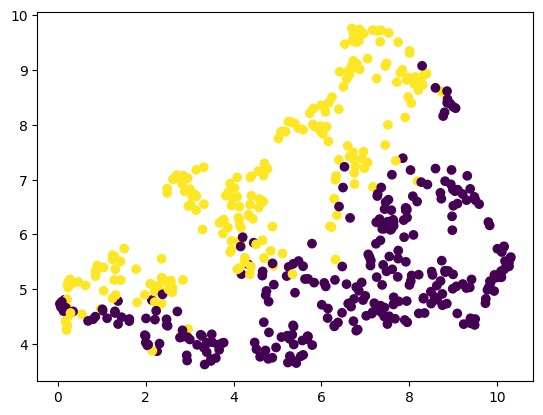

In [44]:
display_umap(pd.DataFrame(cbowsamples0), color=jcounts_zscc.read('clusters').clusters)

### transcribe

In [ ]:
_mircoseqs_ = mircoseqs.with_pic()

In [ ]:
print(DBX.transcribe(_mircoseqs_))

In [ ]:
import fsspec
import micron.datasets


# 'DBX.micron.datasets.miRCoHN@mircohn'
mircohn_roots = {
	'logcounts': f'/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoHN/version={micron.datasets.miRCoHN.VERSION}/logcounts',
	'pivots': f'/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoHN/version={micron.datasets.miRCoHN.VERSION}/pivots',
	'controls': f'/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoHN/version={micron.datasets.miRCoHN.VERSION}/controls',
	'downregulated_mirna_infixes': f'/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoHN/version={micron.datasets.miRCoHN.VERSION}/downregulated_mirna_infixes',
}
mircohn = micron.datasets.miRCoHN(debug=False, verbose=True)

# 'DBX.micron.datasets.miRNA@mirna'
mirna_roots = f'/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRNA/version={micron.datasets.miRNA.VERSION}'
mirna = micron.datasets.miRNA(True, False, True)


# 'DBX.micron.datasets.miRCoSeqs@mircoseqs_10_1000'
mircoseqs_10_1000_scope = micron.datasets.miRCoSeqs.SCOPE(
	logcounts=mircohn.read(mircohn_roots, topic='logcounts'),
	seqs=mirna.read(mirna_roots, ),
	nepochs=10,
	nsamples_per_record=1000,
	npermutations=0,
)
mircoseqs_10_1000_roots = {
	'logcounts': f'/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version={micron.datasets.miRCoSeqs.VERSION}/logcounts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/nepochs=10/nsamples_per_record=1000/npermutations=0',
	'counts': f'/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version={micron.datasets.miRCoSeqs.VERSION}/counts/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/nepochs=10/nsamples_per_record=1000/npermutations=0',
	'seqs': f'/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version={micron.datasets.miRCoSeqs.VERSION}/seqs/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/nepochs=10/nsamples_per_record=1000/npermutations=0',
	'samples': f'/Users/dkarpeyev/.cache/datalake/DBX/micron/datasets/miRCoSeqs/version={micron.datasets.miRCoSeqs.VERSION}/samples/seqs=DBX.micron.datasets.miRNA@mirna/logcounts=DBX.micron.datasets.miRCoHN@mircohn:logcounts/nepochs=10/nsamples_per_record=1000/npermutations=0',
}
micron.datasets.miRCoSeqs(True, False, True).build(
	mircoseqs_10_1000_roots,
	scope=mircoseqs_10_1000_scope,
)